In [1]:
import matplotlib.pyplot as plt
from itertools import groupby

In [2]:
molecule = input("molecule name?")
filepath = "./" + molecule + "/" + molecule + ".fchk"

molecule name?nh3


In [35]:
def find_energies(filepath):
    with open(filepath, "r") as stream:
        file = list(stream)
    for i in file:
        if "Alpha Orbital Energies" in i:
            index = file.index(i)
    file = file[index+1:]

    temp = True
    energies_string = []

    while temp == True:
        for i in file:
            if i.startswith(" "):
                if i.startswith(" -"):
                    energies_string.append(i[1:])
                elif i.startswith("  "):
                    energies_string.append(i[2:])
            else:
                break
            temp = False

    energies_string_2 = []
    for i in energies_string:
        energies_string_2.append(list(filter(None, i[:-1].split(" "))))

    energies = []

    for i in energies_string_2:
        for j in i:
            energies.append(float(j))
            
    i = 0
    while i < len(energies)-1:
        if energies[i+1] - energies[i] < 0.001:
            energies[i+1] += 0.01
        i += 1
    return energies

In [44]:
def full_mo_plot(left, middle, right, connections, occupation, save):
    #ensuring the input lists are in ascending order
    left.sort()
    middle.sort()
    right.sort()
    highest_energy = max([max(left), max(middle), max(right)])
    lowest_energy = min([min(left), min(middle), min(right)])
    figure_height = (highest_energy - lowest_energy) * 15
    #creating plot and adding horizontal energy lines formatting etc
    fig,ax = plt.subplots(figsize=(10,figure_height))
    ax.hlines(left, -2.3,-1.3)
    ax.hlines(middle, -0.5,0.5)
    ax.hlines(right, 1.3, 2.3)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_yticks([0])
    #joining diagonal lines from connections argument
    for i in connections[0]:
        ax.plot([-1.3,-0.5], [left[i[0]], middle[i[1]]], color = "black", linestyle = "--", linewidth = "0.6", dashes=(5, 10))
    for i in connections[1]:
        ax.plot([1.3,0.5], [right[i[0]], middle[i[1]]], color = "black", linestyle = "--", linewidth = "0.6", dashes=(5, 10))
    ax.set_xlim(-2.5,2.5)
    ax.plot([-2.5,2.5], [0,0], linestyle = "--", linewidth = "0.5", dashes=(5, 10), color = "black")
    #adding electrons, making sure they don't overlap
#     i = 0
#     close = []
#     temp = ammonia_energies[1:8]
#     while i < len(temp) - 1:
#         if temp[i+1] - temp[i] < 0.01:
#             close.append(True)
#         else:
#             close.append(False)
#         i += 1
#     close.append(False)
    i = 0
    while i < len(occupation):
        if occupation[i] == 2:
            ax.arrow(-0.02, middle[i]-0.015, 0, 0.03, head_width = 0.04, head_length = 0.007, color = "red")
            ax.arrow(0.02, middle[i]+0.01, 0, -0.03, head_width = 0.04, head_length = 0.007, color = "red")
            i += 1
    if save:
        molecule = input("Molecule Name?")
        fig.savefig(molecule + "_mo.png")
        
        
def central_mo_plot(energies, occupation, save):
    energies.sort()
    energy_range = max(energies) - min(energies)
    y = energy_range / 2
    fig, ax = plt.subplots(figsize = (10,y))
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.hlines(middle, -0.5,0.5)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(-2.5,2.5)
    ax.plot([-2.5,2.5], [0,0], linestyle = "--", linewidth = "0.5", dashes=(5, 10), color = "black")

In [45]:
ammonia_energies = find_energies(filepath)

In [46]:
middle = ammonia_energies[1:8]
left = [-0.351877937, -0.156414803, -0.151414803]
right = [-0.410559242, -0.253, -0.258, -0.263]
connections = [[(0,0),(0,4),(1,1),(1,5)],[(0,0), (0,4), (1,1), (1,5), (2,3)]]
occupation = [2,2,2]

Molecule Name?nh3


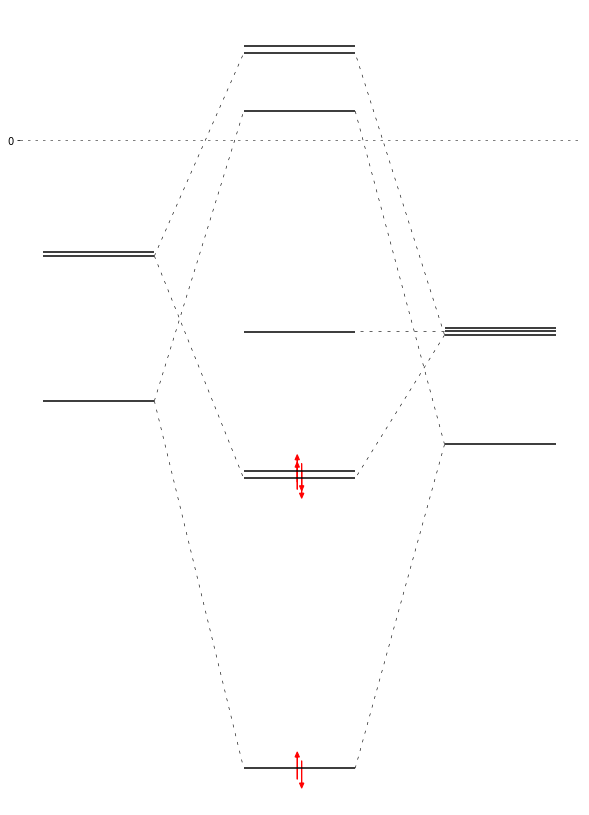

In [47]:
full_mo_plot(left, middle, right, connections, occupation, True)

In [196]:

# i = 0
# while i <= len(temp) - 1:
#     if close[i+1]:
#         close[i] = True
#     i += 1

NameError: name 'close' is not defined

In [15]:
test =[False, True, False, False, False, True, False]

'./nh3/nh3.fchk'

In [16]:
ammonia_energies

[-14.2784861,
 -0.847337138,
 -0.456306779,
 -0.450306779,
 -0.258507965,
 0.0389997143,
 0.117123116,
 0.123123116,
 0.344750664,
 0.350750664,
 0.4742656,
 0.599058236,
 0.718805198,
 0.724805198,
 0.895229381,
 1.11227847,
 1.11827847,
 1.52799505,
 1.55313245,
 1.63857691,
 1.64457691,
 1.86024596,
 1.86624596,
 2.11603561,
 2.38232391,
 2.38832391,
 2.53358678,
 2.6454801,
 2.6514800999999997,
 2.78578701,
 3.04674416,
 3.0527441599999996,
 3.94290571,
 4.71848355,
 4.72448355,
 35.6033528]

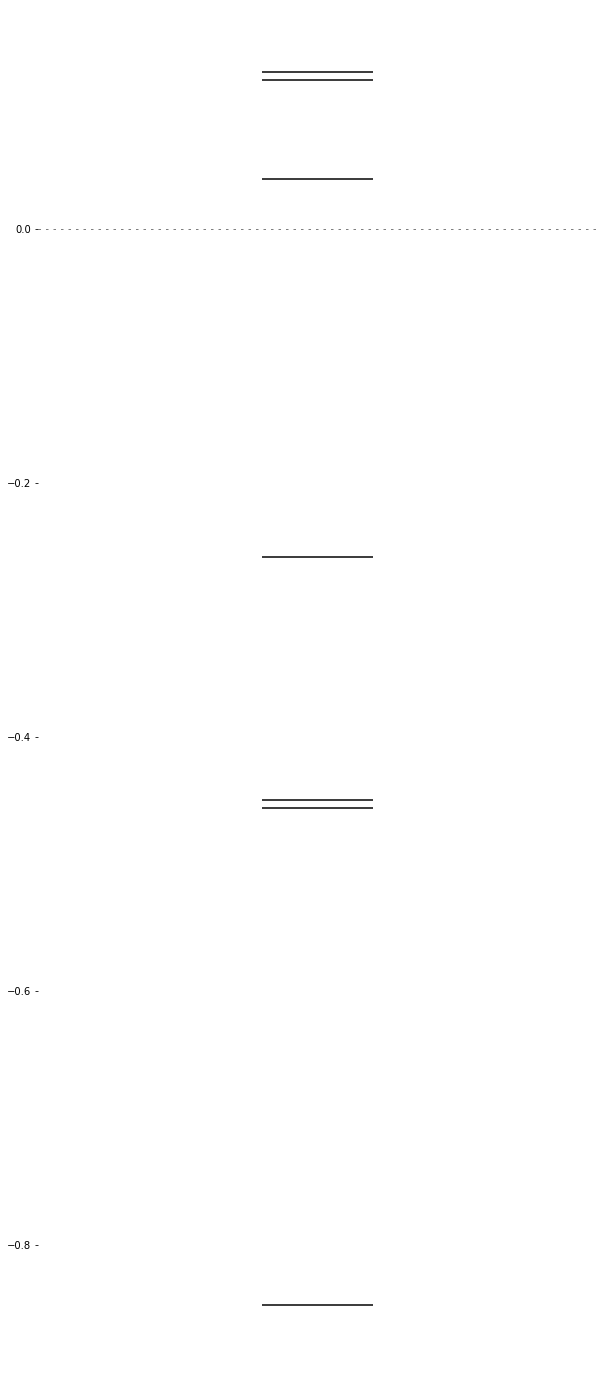

In [22]:
central_mo_plot(ammonia_energies, 0, 0)